In [119]:
import pandas as pd
import numpy as np

data_landmarks = pd.read_csv('MinorAI/dataset2.csv')
data_landmarks.head()

,pixels,emotion
0,9 8 8 8 8 8 11 14 18 18 16 17 19 20 21 24 24 2...,happy
1,63 49 14 11 13 15 21 17 17 8 18 20 18 18 24 27...,sadness
2,21 22 24 23 24 15 4 5 13 26 37 59 75 84 90 100...,happy
3,92 96 214 255 255 255 254 254 254 255 226 103 ...,anger
4,57 11 4 0 10 9 14 23 28 36 38 46 60 69 71 67 6...,happy


In [120]:
data_no_landmarks = pd.read_csv('MinorAI\dataset2.csv')

features = ['pixels']
target = ['emotion']

X = data_no_landmarks.drop('emotion', axis=1)
y = data_no_landmarks['emotion']

# for emotion in data_no_landmarks.emotion:
#     print(emotion)
#     for pixel_sequence in emotion:
#         print('New pixel sequence from here\n')
#         #print(emotion)

X_new = data_landmarks[features]
y_new = data_landmarks[target]

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

enc = LabelEncoder()
X_new = enc.fit_transform(X_new)

X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.30,random_state=21)

C:\Users\pauli\anaconda3\envs\env_dlib\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [136]:
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus

dtree = DecisionTreeClassifier(criterion='gini', max_features=1)
dtree = dtree.fit(X_train.reshape(-1,1), np.array(y_train))
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

True

In [137]:
y_pred = dtree.predict(X_test.reshape(-1,1))

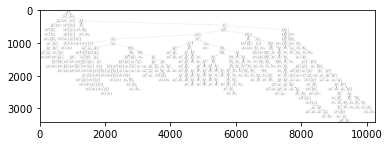

In [138]:
img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [140]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)

39.58333333333333
